<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acknowledgements</a></span></li><li><span><a href="#Words-indicative-of-(5-star)-and-(1-star)-reviews" data-toc-modified-id="Words-indicative-of-(5-star)-and-(1-star)-reviews-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Words indicative of (5-star) and (1-star) reviews</a></span><ul class="toc-item"><li><span><a href="#Words-indicative-of-5-star-reviews" data-toc-modified-id="Words-indicative-of-5-star-reviews-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Words indicative of 5-star reviews</a></span></li><li><span><a href="#Words-indicative-of-1-star-reviews" data-toc-modified-id="Words-indicative-of-1-star-reviews-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Words indicative of 1-star reviews</a></span></li></ul></li></ul></div>

# Acknowledgements 
Thank you to 
https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

# Words indicative of (5-star) and (1-star) reviews

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import the stop word list


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daviderickson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def load_reviews(size='small'): 
    if size == 'small':
        filename = r'../../data/small-review.json'
    elif size == 'intermediate':
        filename = r'../../data/intermediate-review.json'
    elif size == 'full':
        filename = r'../../data/review.json'
    new_list = []
    for line in open(filename):
       new_list.append(json.loads(line))
    return pd.DataFrame.from_records(new_list)

dfreviews = load_reviews(size='intermediate')

In [3]:
dfreviews['text'][0]

'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'

In [4]:
# For simplicity, drop anything that isn't a letter
# Numbers and symbols may have interesting meaning and could be explore later

def lettersOnly(string):
    return re.sub("[^a-zA-Z]", " ", string) 

dfreviews['text'] = dfreviews['text'].apply(lettersOnly)


In [5]:
dfreviews['text'][0]

'Total bill for this horrible service  Over   Gs  These crooks actually had the nerve to charge us     for   pills  I checked online the pills can be had for    cents EACH  Avoid Hospital ERs at all costs '

In [6]:
def review_to_words(string):
    string = re.sub("[^a-zA-Z]", " ", string) # keep only letters. more complex model possible later
    words =  string.lower().split() # make everything lowercase. split into words
    stops = set(stopwords.words('english')) # create a fast lookup for stopwords
    words = [w for w in words if not w in stops] # remove stopwords
    return( " ".join( words )) # recombine review and return
    
# dfreviews['text'] = dfreviews['text'].apply(review_to_words) # apply to reviews in dataframe


In [7]:
dfreviews['text'] = dfreviews['text'].apply(review_to_words)

In [8]:
dfreviews['text'][0]

'total bill horrible service gs crooks actually nerve charge us pills checked online pills cents avoid hospital ers costs'

In [9]:
print("Creating the TFIDF...\n")
from sklearn.feature_extraction.text import TfidfVectorizer

no_features = 1000

# Initialize the "TfidfVectorizer" object, which is scikit-learn's
# term frequency, inverse document frequency (TFIDF) tool.  
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df=15, \
                             analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = no_features) # 5000

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf = tfidf_vectorizer.fit_transform(dfreviews['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfidf = tfidf.toarray()

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

Creating the TFIDF...



In [10]:
print("Creating the bag of words for LDA...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# tf bag of words tool.  
tf_vectorizer = CountVectorizer(max_df = 0.95, min_df=15, \
                             analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = no_features) # 5000

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tf = tf_vectorizer.fit_transform(dfreviews['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
tf = tf.toarray()

tf_feature_names = tf_vectorizer.get_feature_names()

Creating the bag of words for LDA...



In [11]:
print(tfidf.shape)
print(tf.shape)

(100000, 1000)
(100000, 1000)


In [12]:
# Take a look at the words in the vocabulary
print(tfidf_feature_names)
print(tf_feature_names)

['able', 'absolutely', 'accommodating', 'across', 'actually', 'add', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'air', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amazing', 'ambiance', 'amount', 'another', 'answer', 'anyone', 'anything', 'anyway', 'anywhere', 'apparently', 'appetizer', 'appetizers', 'apple', 'appointment', 'appreciate', 'area', 'around', 'arrived', 'asian', 'ask', 'asked', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avoid', 'away', 'awesome', 'awful', 'baby', 'back', 'bacon', 'bad', 'bag', 'baked', 'bar', 'bartender', 'based', 'basically', 'bathroom', 'bbq', 'beans', 'beautiful', 'bed', 'beef', 'beer', 'beers', 'behind', 'believe', 'best', 'better', 'beyond', 'big', 'bill', 'birthday', 'bit', 'bite', 'black', 'bland', 'blue', 'book', 'bottle', 'bottom', 'bought', 'bowl', 'box', 'boyfriend', 'bread', 'breakfast', 'bring', 'brisket', 'brought', 'brunch', 'buffet', 'building'

In [33]:
no_topics = 100 

from sklearn.decomposition import NMF, LatentDirichletAllocation

# Run NMF
print('Running NMF...')
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
print('Finished NMF')

# Run LDA
print('Running LDA...')
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print('Finished LDA')

Running NMF...
Finished NMF
Running LDA...
Finished LDA


In [34]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
yummy fried garlic games game future fun full fruit frozen
Topic 1:
said told called call asked company phone could day business
Topic 2:
great atmosphere spot service fantastic patio thanks value ambiance vibe
Topic 3:
food eat fast mexican service portions authentic chinese indian atmosphere
Topic 4:
sauce bbq pork meat flavor sweet spicy brisket ribs dish
Topic 5:
pizza crust toppings thin delivery wings italian pie garlic style
Topic 6:
always favorite come usually coming busy years makes often sometimes
Topic 7:
good overall service value though still thing drinks stuff tried
Topic 8:
chicken fried wings fries curry spicy dry crispy butter indian
Topic 9:
staff friendly helpful knowledgeable attentive extremely accommodating fast quick professional
Topic 10:
best town hands far part valley ever city charlotte phoenix
Topic 11:
time first next last second long visit waste took today
Topic 12:
service customer slow fast horrible quick poor terrible friendly bad
Topic 13:
pl

## Words indicative of 5-star reviews

In [35]:
# Want to understand words predictive of 5-star reviews
# Make a label that is 5-star and build a model to predict
ydata = (dfreviews['stars'] == 5)
ydata.head()

0    False
1     True
2     True
3     True
4    False
Name: stars, dtype: bool

In [36]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
lda_trans = lda.transform(tf)
forest = forest.fit( lda_trans, ydata )

Training the random forest...


In [37]:
def return_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
#         print("Topic %d:" % (topic_idx))
        topics.append(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics


topicImportances = pd.DataFrame(data=zip(return_topics(lda, tf_feature_names, no_top_words), 
                                         forest.feature_importances_), columns=['Topic', 'Importance'])
topicImportances.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)
topicImportances.head()

,Topic,Importance
46,great amazing drinks fantastic wow experience ...,0.049731
59,always love awesome great place staff friendly...,0.045794
1,recommend excellent highly would great service...,0.035678
42,work staff care office dr professional friendl...,0.031688
21,best quality ever price one far town place val...,0.029472


In [ ]:
wordImportances = pd.DataFrame(data=zip(vocab, forest.feature_importances_), columns=['Word', 'Importance'])
wordImportances.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)

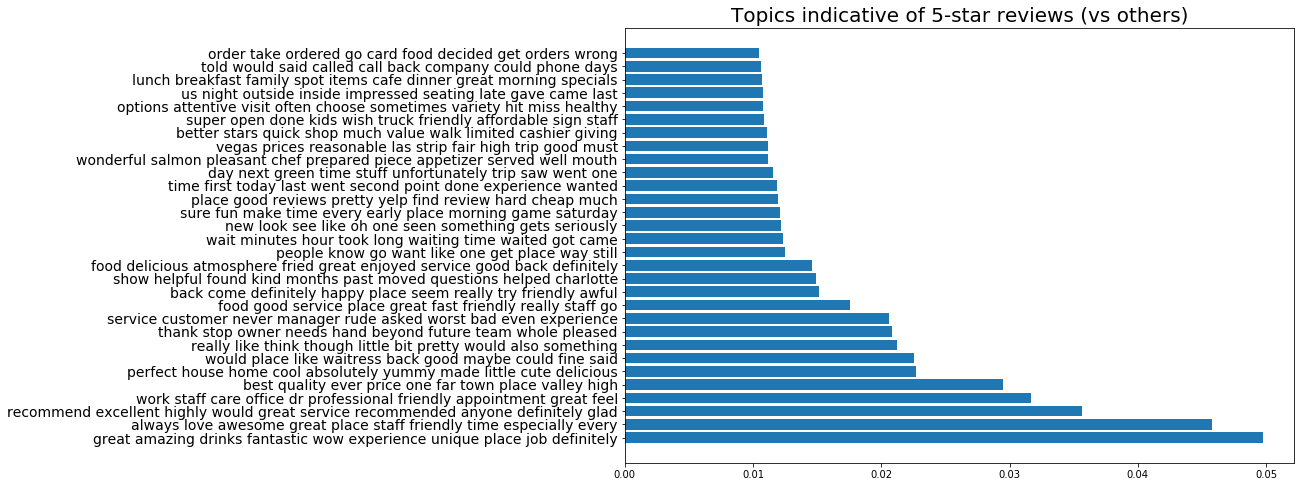

In [39]:
plt.figure(figsize=(12,8))
plt.barh(y='Topic', width='Importance', data=topicImportances[:30]);
plt.yticks(rotation='horizontal', fontsize=14);
plt.title('Topics indicative of 5-star reviews (vs others)', fontsize=20);

In [ ]:
wordImportances.head(10)

## Words indicative of 1-star reviews

In [ ]:
# Want to understand words predictive of 5-star reviews
# Make a label that is 5-star and build a model to predict
ydata1 = (dfreviews['stars'] == 1)
ydata1.head()

In [ ]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest1 = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest1 = forest1.fit( train_data_features, ydata1 )

In [ ]:
wordImportances1 = pd.DataFrame(data=zip(vocab, forest1.feature_importances_), columns=['Word', 'Importance'])
wordImportances1.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(y='Word', width='Importance', data=wordImportances1[:30]);
plt.yticks(rotation='horizontal', fontsize=14);
plt.title('Words indicative of 1-star reviews (vs others)', fontsize=20);

In [ ]:
df_wI5_wI1 = wordImportances.merge(wordImportances1, how='outer', on='Word', suffixes=('_5star', '_1star'))

In [ ]:
df_wI5_wI1.sort_values(by=['Importance_5star'], axis=0, ascending=False, inplace=True)
df_wI5_wI1.head()

In [ ]:

df_wI5_wI1[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)

In [ ]:
df_wI5_wI1['Word'][:30]

In [ ]:

df_wI5_wI1.sort_values(by='Importance_1star', ascending=False)[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)

In [ ]:
df_wI5_wI1['Importance_5x1'] = df_wI5_wI1['Importance_1star'] * df_wI5_wI1['Importance_5star']

In [ ]:

df_wI5_wI1.sort_values(by='Importance_5x1', ascending=False)[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)